In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit

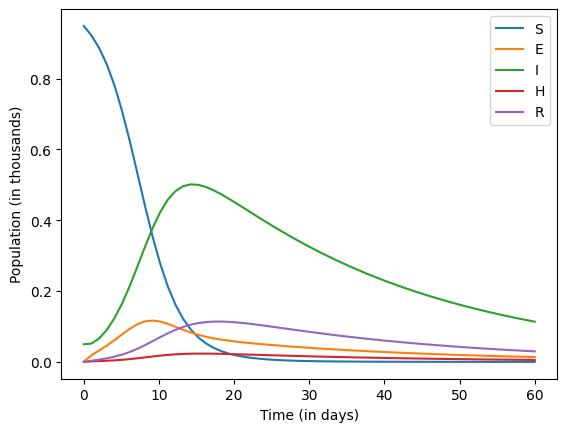

In [ ]:
N = 1000
y0 = np.array([N - 51, 1, 50, 0, 0])/N
span = (0, 60)
beta = 0.5
b = 0
epsilon = 0.7
r1 = 0.4
r2 = 0.5
sigma = 0.9
gamma = 1/14
eta = 1/21
omega = 0.5
mu1 = 0.05
mu2 = 0.01
params = [beta, b, epsilon, r1, r2, sigma, gamma, omega, mu1, mu2]

def model_1(x, z, beta, b, epsilon, r1, r2, sigma, gamma, omega, mu1, mu2):
  S, E, I, H, R = z
  dS_dt = -beta * S * I * (1-b)  - epsilon * beta * S * E * (1-b)
  dE_dt = beta * S * I * (1-b) + epsilon * beta * S * E * (1-b) - sigma * E + r1 * R
  dI_dt = sigma * E - gamma * I - eta * I - mu1 * I + r2 * H
  dH_dt = eta * I - omega * H - mu2 * H - r2 * H
  dR_dt = gamma * I + omega * H - r1 * R
  return np.array([dS_dt, dE_dt, dI_dt, dH_dt, dR_dt])

sol = solve_ivp(model_1, [span[0], span[-1]], y0, args = params, dense_output=True)
t = np.linspace(span[0], span[-1], span[-1])
z = sol.sol(t)

plt.plot(t, z.T)
plt.xlabel("Time (in days)")
plt.ylabel("Population (in thousands)")
plt.legend(["S", "E", "I", "H", "R"])

In [ ]:
def SEITR_forward(span, initial, parameters):
  return solve_ivp(model_1, span, initial, args = tuple(parameters), dense_output=True)

In [ ]:
span = np.array([0,60])
initial = np.array([949, 1, 50, 0, 0]) / N
parameters = params

sol = SEITR_forward(span, initial, parameters)

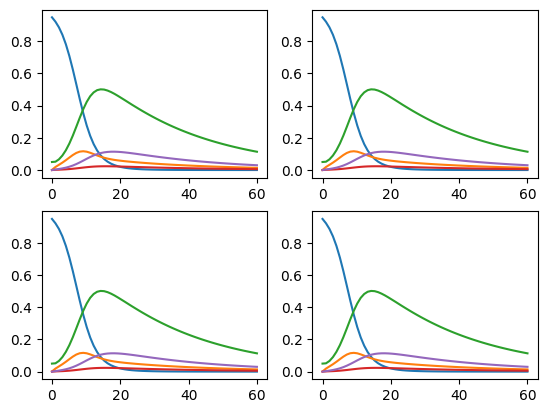

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
for ax in axes.flatten():
  ax.plot(t, z.T)

In [ ]:
np.arange(1, 11).reshape(5, 2).flatten()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

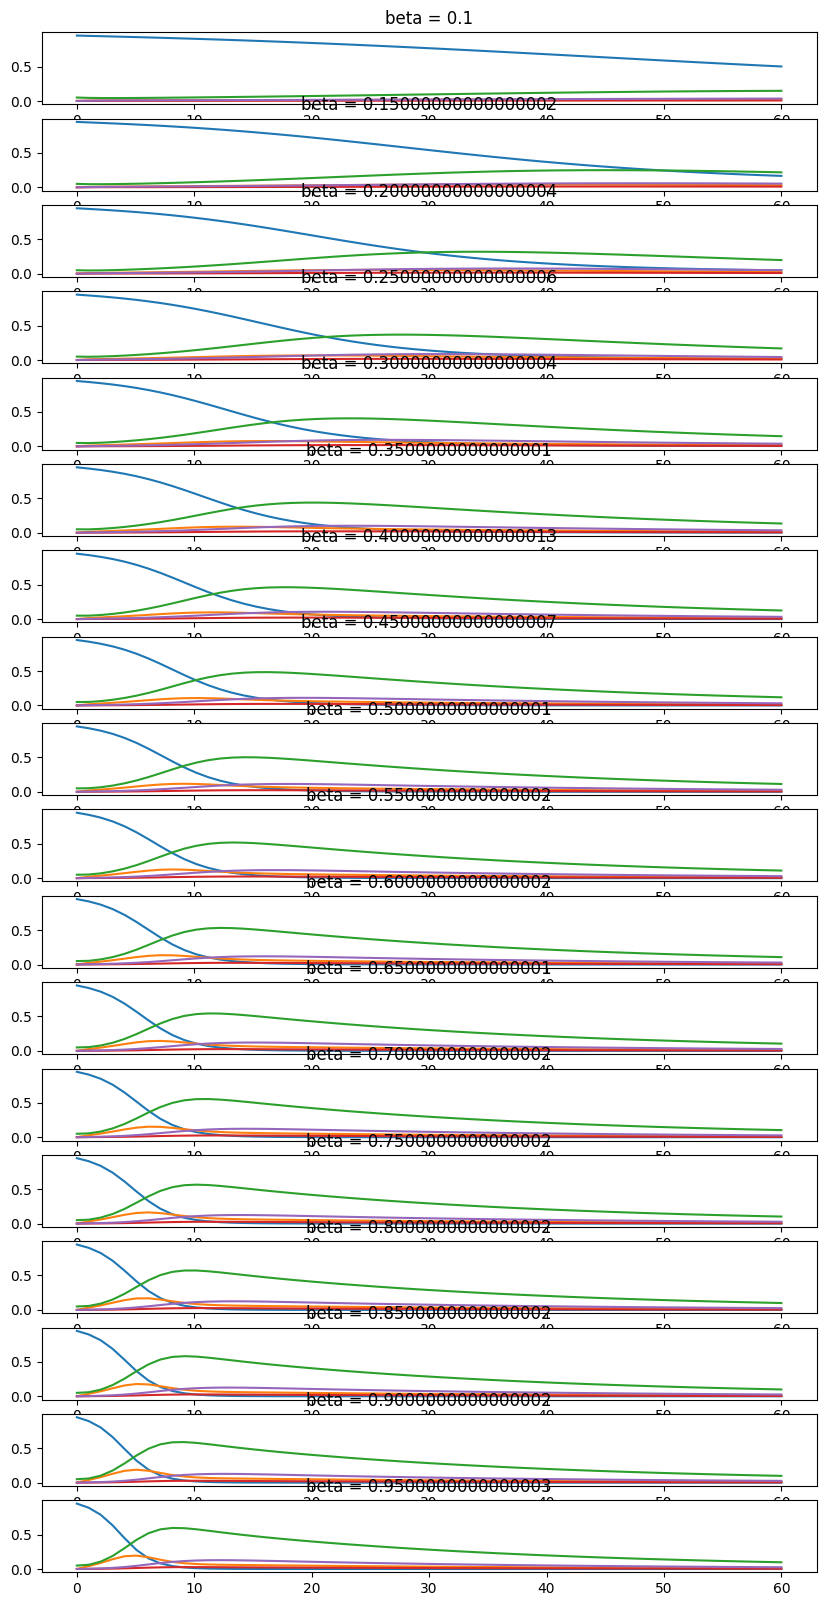

In [ ]:
betas = np.arange(0.1, 1, 0.05)
nplots = betas.size
fig, axes = plt.subplots(nrows=nplots, figsize=(10, 20))
max_infect_dict = {}  # keys are betas and values are the max infect
n_betas = betas.size
max_infect_array = np.zeros(shape=(n_betas, 4), dtype=float)

for i, (ax, beta) in enumerate(zip(axes, betas)):
  parameters[0] = beta
  sol = SEITR_forward(span, initial, parameters)
  t0, tn = span
  t = np.linspace(t0, tn, tn - t0)
  z = sol.sol(t)
  max_infect_dict[beta] = [max(z[1,:]), max(z[2,:]), max(z[1,:] + z[2,:])] #max of E, I and E + I
  max_infect_array[i, :] = [beta, max(z[1,:]), max(z[2,:]), max(z[1,:] + z[2,:])]
  ax.plot(t, z.T)
  ax.set_title(f"beta = {beta}")
  # ax.xlabel("t")
  # ax.ylabel("Population")
  # ax.legend(["S", "E", "I", "T", "R"])


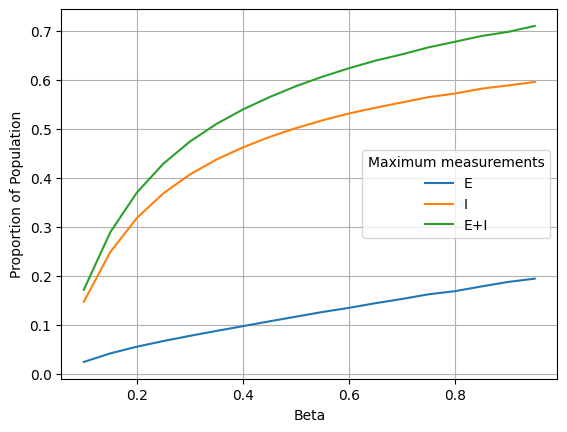

In [ ]:
plt.plot(betas, max_infect_array[:,1])
plt.plot(betas, max_infect_array[:,2])
plt.plot(betas, max_infect_array[:,3])
plt.xlabel("Beta")
plt.ylabel("Proportion of Population")
plt.legend(["E","I", "E+I"], title = "Maximum measurements")
plt.grid()